# $\text{CO}_2 \text{ Emissions Trend Analysis}$

In [1]:
#1b9e77 
#d95f02
#7570b3
#e7298a
#e6ab02

## **Setup**

#### **Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### **Loading Data**


In [3]:
df = pd.read_csv('annual_global_CO2_levels', 
                 delimiter = "\t", 
                 names = ["Year", "CO2 Level"], 
                 skiprows = 1)

#### **Graphing Data**

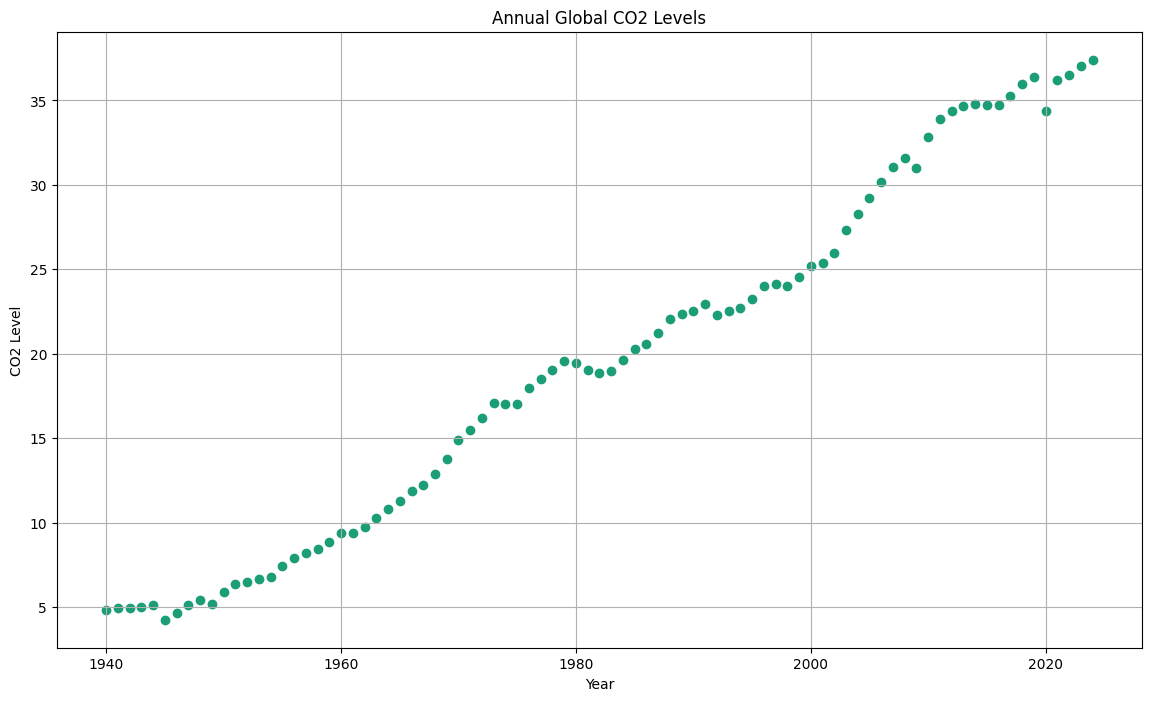

In [4]:
plt.figure(figsize = (14, 8))
plt.scatter(df['Year'], df['CO2 Level'], color = '#1b9e77', label = 'Data')
plt.xlabel('Year')
plt.ylabel('CO2 Level')
plt.title('Annual Global CO2 Levels')
plt.grid(True)
plt.show()

#### **Scaling Data**

Scaling is required here because the x-values are in thousands and the y-values are in single or double digits.

In [5]:
x_values = df['Year'].values.astype(np.float32)
x_values = (x_values - x_values.min()) / (x_values.max() - x_values.min())

y_values = df['CO2 Level'].values.astype(np.float32)
y_values = (y_values - y_values.min()) / (y_values.max() - y_values.min())

#### **Splitting Data**

Splitting the data into training, validation, and testing sets.

In [6]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x_values, y_values, test_size = 0.2, random_state = 13)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = 0.2, random_state = 13)

## **Model Selection**

Based on the visual analysis of the annual global CO2 levels data, a *linear model* would be a logical starting point for this analysis. The overall trend of the data appears to be relatively linear, exhibiting a steady, consistent increase in CO2 emissions over the decades. While the data points do not perfectly align with a straight line, a linear model can still serve as a reasonable approximation to capture the general upward trajectory. Fitting a linear model will provide insights into the average rate of change in CO2 levels and establish a baseline for comparison against more complex modeling approaches.

To capture the nuances and potential fluctuations in the emissions trend more accurately, a *sinusoidal model* may be a valuable addition to the analysis. The data appears to show some periodic or cyclical patterns, which could be indicative of underlying factors influencing the CO2 levels over time. A sinusoidal model, with its wave-like behavior, can help identify and quantify any recurring components in the emissions data that may not be fully captured by a linear model alone.

Considering the overall increasing nature of the CO2 levels, an *exponential model* may also be worth exploring. Exponential growth functions are often used to describe phenomena that exhibit compounding increases, which could be the case for global emissions. However, on the other hand, if a decrease in population growth is projected, or if significant changes in energy consumption patterns are anticipated, a *square root model* may be more appropriate. This model type can capture a decelerating growth rate, reflecting a potential slowdown in CO2 emissions as global dynamics shift.

So for this project, we will analyze and compare the performance of **linear, sinusoidal, exponential, and square root models** to determine the best fit for the CO2 emissions trend data.

## **Error Metrics Selection**

Mean Absolute Error (MAE) is a robust and interpretable loss function that quantifies the average magnitude of errors between predicted and actual values. Unlike Mean Squared Error (MSE), MAE treats all errors equally by measuring their absolute value, making it less sensitive to outliers. Given the potential for noise or anomalies in global CO2 emissions data, MAE ensures that a few extreme data points do not disproportionately influence the gradient descent optimization. This aligns well with our objective to understand general trends rather than overfitting to specific irregularities in the dataset.

$$ E = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

## **Modeling**

### **Linear Model**

The linear follows the equation:

$$y = mx + b$$

In [7]:
# linear function
def linearModel(m: float, b: float, x:np.ndarray) -> float:
    return m * x + b

To visualize the initial model, we set arbitrary values for $m$ and $b$ that provide a rough approximation of the data trend:

In [8]:
# Initial parameter values
m = 1.0
b = 0.0

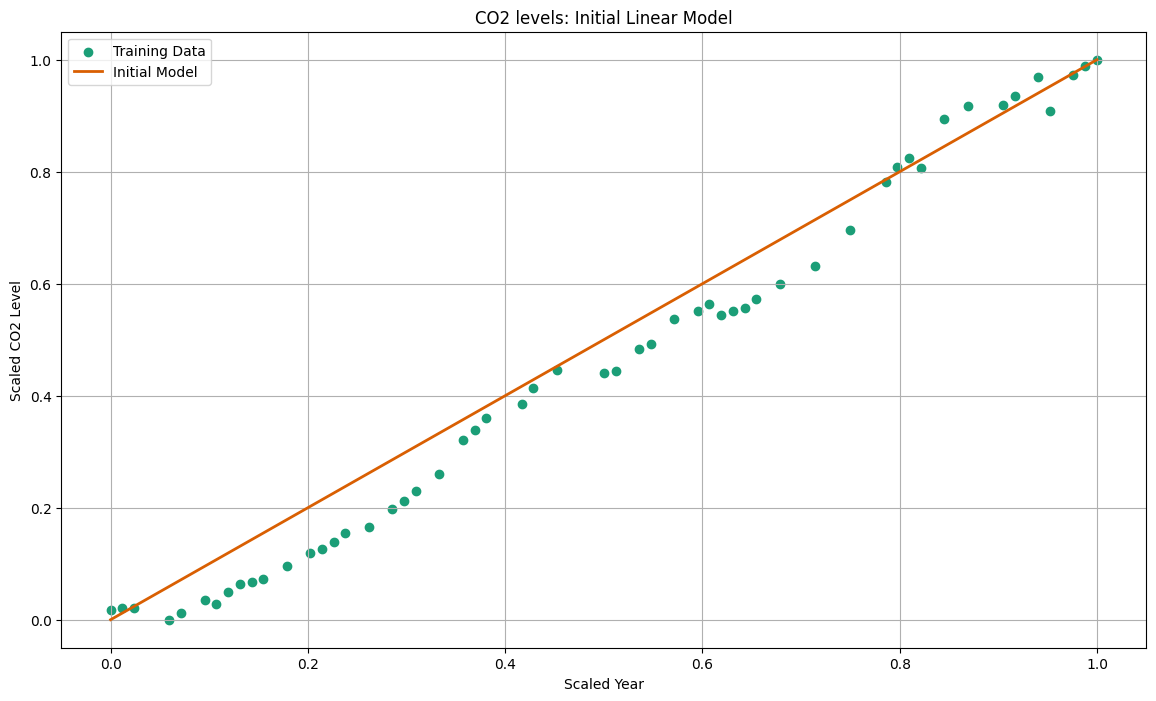

In [9]:
x = np.linspace(0, 1, 100)
y = linearModel(m, b, x)

plt.figure(figsize = (14, 8))
plt.scatter(x_train, y_train, color = '#1b9e77', label = 'Training Data')
plt.plot(x, y, linewidth = 2, color = '#d95f02', label = 'Initial Model')
plt.xlabel('Scaled Year')
plt.ylabel('Scaled CO2 Level')
plt.title('CO2 levels: Initial Linear Model')
plt.legend()
plt.grid(True)
plt.show()

This visualization provides a baseline for comparison and a starting point for optimization. The next step is to apply gradient descent to iteratively refine $m$ and $b$, minimizing the error between the predicted and actual values.

#### **Gradient Descent**

For this task, we aim to minimize the Mean Absolute Error (MAE) between the predicted and actual CO2 levels. The MAE is defined as:

$$ E = \frac{1}{n} \sum_{i=1}^{n} |[mx_i + b] - y_i| $$

In [10]:
def linearError(m: float, b: float, x:np.ndarray, y:np.ndarray) -> float:
    return np.mean((np.abs(linearModel(m, b, x) - y)))

The partial derivatives of the MAE with respect to $m$ and $b$ are computed as follows:

$$ \frac{\partial E}{\partial m} = \frac{1}{n} \sum_{i=1}^{n} \text{sign}([mx_i + b] - y_i) \cdot x_i $$ 

$$ \frac{\partial E}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} \text{sign}([mx_i + b] - y_i) $$

These gradients guide the update of $m$ and $b$ to decrease error.

Before starting the optimization loop, we define hyperparameters for the learning rate and number of iterations (epochs):

In [11]:
# Hyperparameters
learning_rate = 1E-3
epochs = 50

In [12]:
# Track losses
training_loss = []
validation_loss = []

# Gradient descent loop
for epoch in range(epochs):
    # Compute predictions for the training set
    y_pred_train = linearModel(m, b, x_train)
    
    # Compute gradients
    dm = np.mean(np.sign(y_pred_train - y_train) * x_train)
    db = np.mean(np.sign(y_pred_train - y_train))
    
    # Update parameters
    m -= learning_rate * dm
    b -= learning_rate * db
    
    # Compute training loss
    loss = linearError(m, b, x_train, y_train)
    training_loss.append(loss)
    
    # Compute validation loss
    y_pred_val = linearModel(m, b, x_val)
    val_loss = linearError(m, b, x_val, y_val)
    validation_loss.append(val_loss)
    
    # Log progress
    if epoch % 10 == 0:
        print(f'Epoch {epoch}: Training Loss = {loss:.4f}, Validation Loss = {val_loss:.4f}')
        
# Print final results
print("---------------------------------------")
print(f'Final Training Loss: {linearError(m, b, x_train, y_train):.4f}')
print(f'Final Validation Loss: {linearError(m, b, x_val, y_val):.4f}')
print(f'Optimized Parameters: m = {m:.4f}, b = {b:.4f}')

Epoch 0: Training Loss = 0.0498, Validation Loss = 0.0485
Epoch 10: Training Loss = 0.0468, Validation Loss = 0.0453
Epoch 20: Training Loss = 0.0447, Validation Loss = 0.0433
Epoch 30: Training Loss = 0.0430, Validation Loss = 0.0418
Epoch 40: Training Loss = 0.0416, Validation Loss = 0.0411
---------------------------------------
Final Training Loss: 0.0406
Final Validation Loss: 0.0411
Optimized Parameters: m = 0.9956, b = -0.0212


#### **Convergence Criteria**

To ensure the gradient descent algorithm has converged, we analyze the progression of the loss (error) on both the training and validation sets across epochs. Convergence is achieved when the losses stabilize, indicating that further iterations yield minimal improvement.

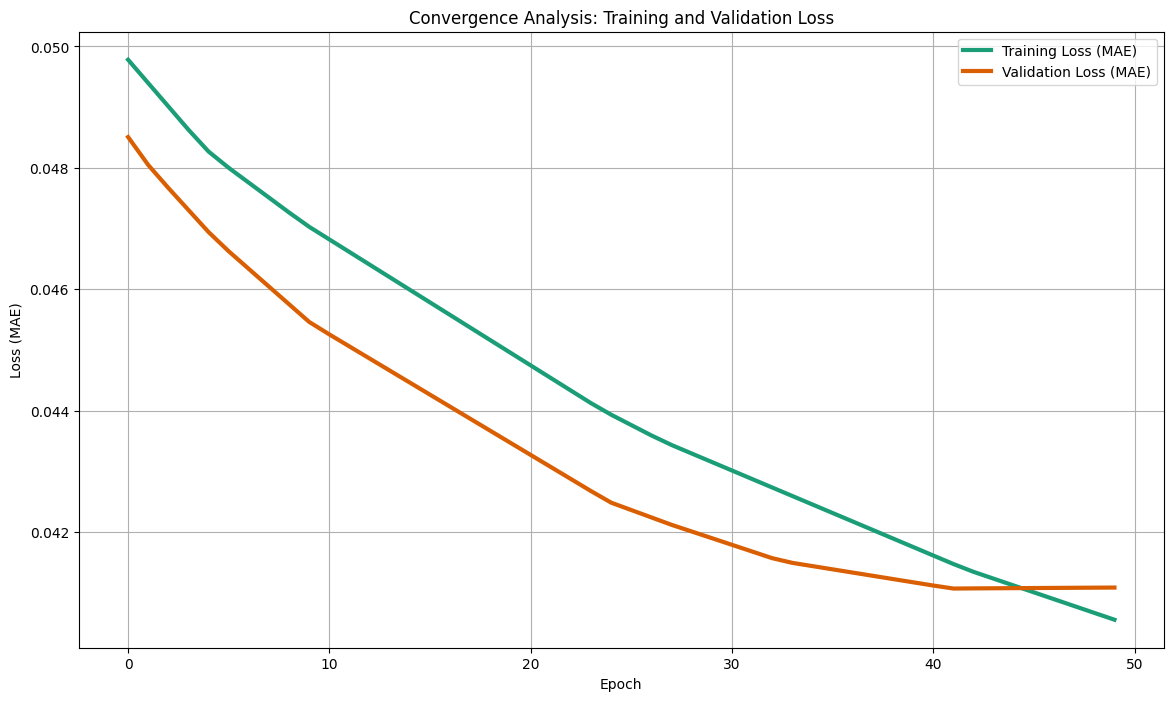

In [13]:
# Plot training and validation losses
plt.figure(figsize=(14, 8))
plt.plot(training_loss, label='Training Loss (MAE)', linewidth=3, color='#1b9e77')
plt.plot(validation_loss, label='Validation Loss (MAE)', linewidth=3, color='#d95f02')
plt.xlabel('Epoch')
plt.ylabel('Loss (MAE)')
plt.title('Convergence Analysis: Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

Both training and validation losses decrease sharply during the first few epochs, indicating that the model is effectively learning the general trend of the data. By approximately 40 epochs, the validation loss plateaus, showing minimal further change. This stabilization is a key indicator of convergence, as the model parameters reach an optimal configuration with respect to the given data. The gap between training and validation losses is small, suggesting that the model generalizes well without significant overfitting or underfitting.

This outcome validates the chosen hyperparameters (learning rate, epochs) and confirms the stability of the optimization process.

#### **Final Linear Model** 

Using the optimized parameters, the final linear model is visualized alongside the training and testing data to assess its performance:

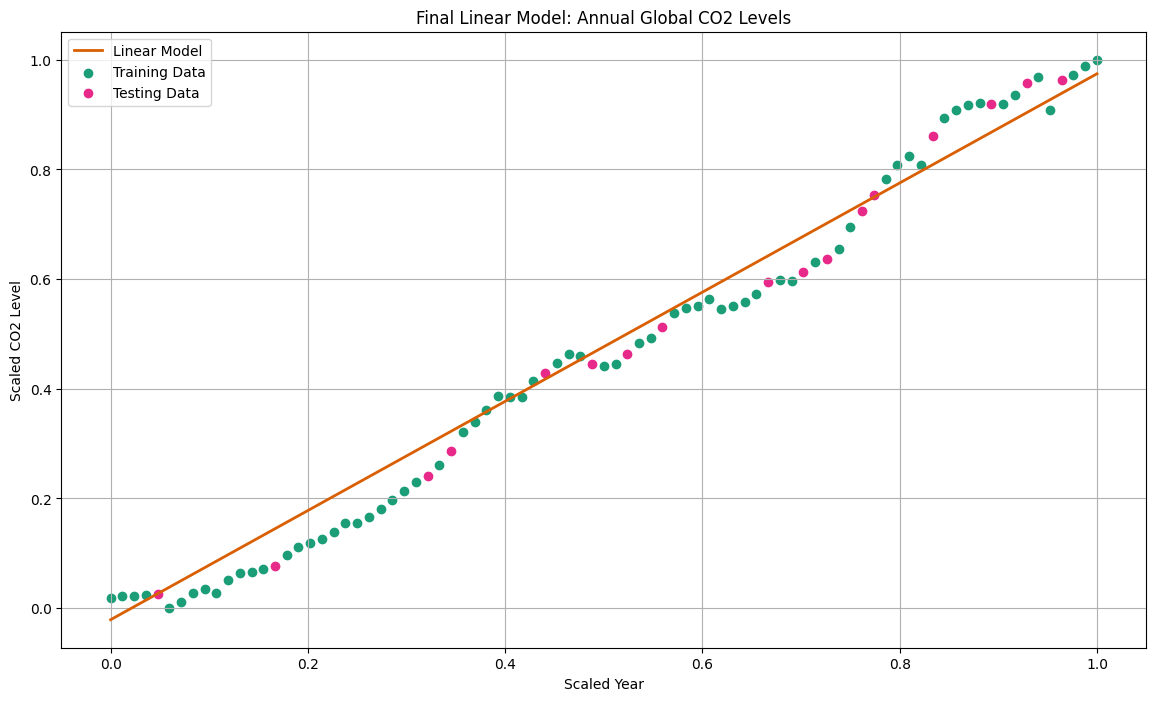

In [14]:
# Generate predictions for visualization
x = np.linspace(0, 1, 100)
y = linearModel(m, b, x)

# Plot the final model
plt.figure(figsize=(14, 8))
plt.plot(x, y, linewidth=2, color='#d95f02', label='Linear Model')
plt.scatter(x_train_val, y_train_val, color='#1b9e77', label='Training Data')
plt.scatter(x_test, y_test, color='#e7298a', label='Testing Data')
plt.xlabel('Scaled Year')
plt.ylabel('Scaled CO2 Level')
plt.title('Final Linear Model: Annual Global CO2 Levels')
plt.legend()
plt.grid(True)
plt.show()

The resulting model is expressed as:

$$ y = 0.995x - 0.02$$

#### **Model Testing & Error Analysis**

Final Test Loss (MAE): 0.0371


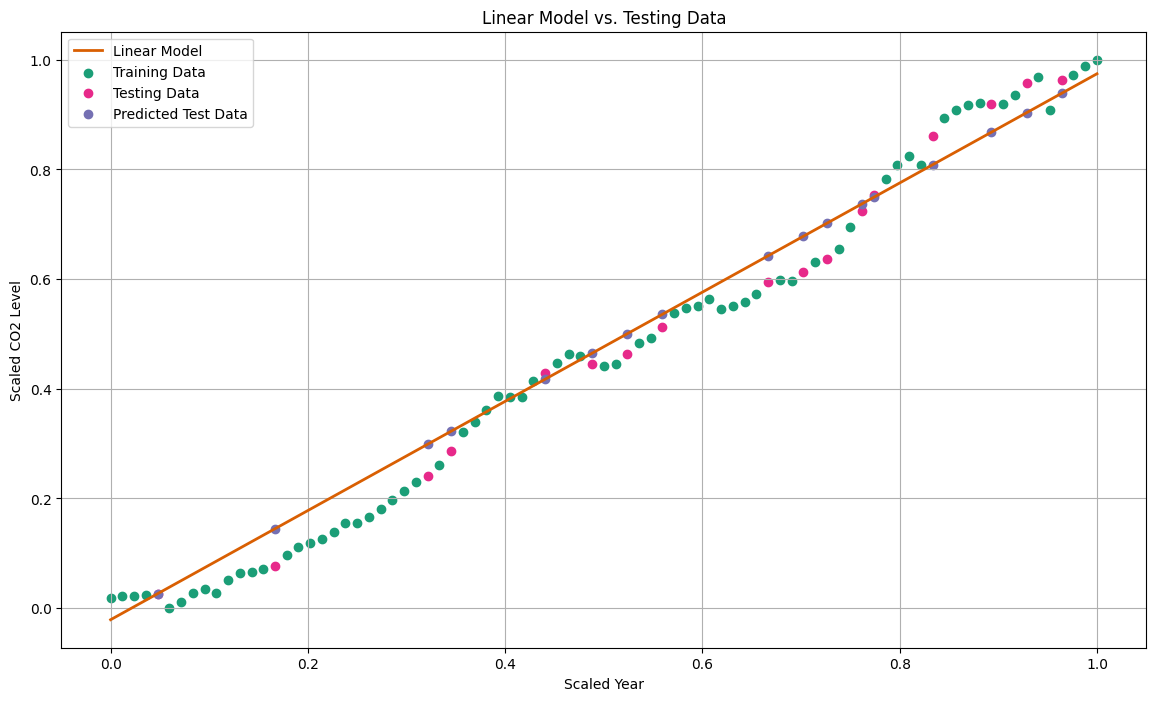

In [15]:
# Evaluate the model on the test set
y_pred_test = linearModel(m, b, x_test)
test_loss = linearError(m, b, x_test, y_test)

# Print the test loss
print(f"Final Test Loss (MAE): {test_loss:.4f}")

# Plot the model's predictions against the test data
plt.figure(figsize=(14, 8))
plt.plot(x, y, linewidth=2, color='#d95f02', label='Linear Model')
plt.scatter(x_train_val, y_train_val, color='#1b9e77', label='Training Data')
plt.scatter(x_test, y_test, color='#e7298a', label='Testing Data')
plt.scatter(x_test, y_pred_test, color='#7570b3', label='Predicted Test Data')
plt.xlabel('Scaled Year')
plt.ylabel('Scaled CO2 Level')
plt.title('Linear Model vs. Testing Data')
plt.legend()
plt.grid(True)
plt.show()

The linear model performed well across all datasets, achieving a Mean Absolute Error (MAE) of 4.0% on the training set, 4.1% on the validation set, and 3.71% on the testing set. The small difference between training, validation, and testing losses indicates that the model generalizes effectively to unseen data, with no signs of significant overfitting or underfitting.

The final model captures the consistent upward trend in CO2 emissions over time. The positive slope of 0.995 reflects the steady increase in emissions, aligning with global patterns of industrialization and population growth.

While the linear model is simple and interpretable, it may not fully capture potential nonlinear or cyclical variations in the data. Nonetheless, its low error and strong generalization make it a solid baseline for comparison with more complex models, such as sinusoidal or exponential, which will be explored next.

---

### **Sinusoidal Model**

The sinusoidal (sin) model is defined as:

$$ y = a \sin(bx + c) + d $$

In [16]:
# Sin function
def sinModel(a: float, b: float, c: float, d: float, x: np.ndarray) -> np.ndarray:
    return a * np.sin(b * x + c) + d

Setting arbitrary initial values for the parameters:

In [17]:
# Initial parameter values
a = 1.2
b = 1.0
c = 0.0
d = 0.0

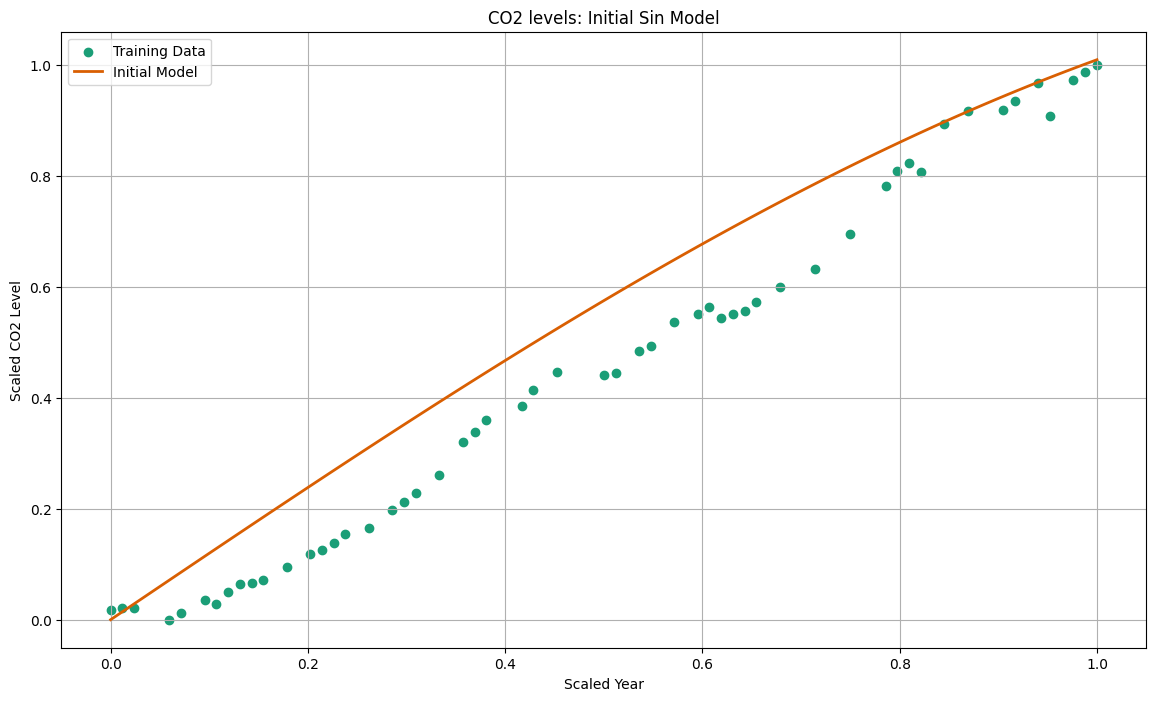

In [18]:
x = np.linspace(0, 1, 100)
y = sinModel(a, b, c, d, x)

plt.figure(figsize = (14, 8))
plt.scatter(x_train, y_train, color = '#1b9e77', label = 'Training Data')
plt.plot(x, y, linewidth = 2, color = '#d95f02', label = 'Initial Model')
plt.xlabel('Scaled Year')
plt.ylabel('Scaled CO2 Level')
plt.title('CO2 levels: Initial Sin Model')
plt.legend()
plt.grid(True)
plt.show()

Seems like a good starting point for the sinusoidal model. The next step is to optimize these parameters using gradient descent to minimize the Mean Absolute Error (MAE) between the predicted and actual CO2 levels.

#### **Gradient Descent**

We aim to minimize the Mean Absolute Error (MAE) between the predicted and actual CO2 levels. The MAE is defined as:

$$ E = \frac{1}{n} \sum_{i=1}^{n} |[a \sin(bx_i+c) + d] - y_i| $$

In [19]:
def sinError(a: float, b: float, c:float, d:float, x:np.ndarray, y:np.ndarray) -> float:
    return np.mean((np.abs(sinModel(a, b, c, d, x) - y)))

The partial derivatives of the MAE with respect to $a$, $b$, $c$, and $d$ are computed as follows:

$$ \frac{\partial E}{\partial a} = \frac{1}{n} \sum_{i=1}^{n} \text{sign}([a \sin(bx_i+c) + d] - y_i) \cdot \sin(bx_i+c) $$

$$ \frac{\partial E}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} \text{sign}([a \sin(bx_i+c) + d] - y_i) \cdot a \cos(bx_i+c) \cdot x_i $$

$$ \frac{\partial E}{\partial c} = \frac{1}{n} \sum_{i=1}^{n} \text{sign}([a \sin(bx_i+c) + d] - y_i) \cdot a \cos(bx_i+c) $$

$$ \frac{\partial E}{\partial d} = \frac{1}{n} \sum_{i=1}^{n} \text{sign}([a \sin(bx_i+c) + d] - y_i) $$

These gradients guide the update of $a$, $b$, $c$, and $d$ to decrease error.

Before starting the optimization loop, we define hyperparameters for the learning rate and number of iterations (epochs):

In [20]:
# Hyperparameters
learning_rate = 1E-4
epochs = 800

In [21]:
# Track losses
training_loss = []
validation_loss = []

# Gradient descent loop
for epoch in range(epochs):
    # Compute predictions for the training set
    y_pred_train = sinModel(a, b, c, d, x_train)
    
    # Compute gradients
    da = np.mean(np.sign(y_pred_train - y_train) * np.sin(b * x_train + c))
    db = np.mean(np.sign(y_pred_train - y_train) * a * x_train * np.cos(b * x_train + c))
    dc = np.mean(np.sign(y_pred_train - y_train) * a * np.cos(b * x_train + c))
    dd = np.mean(np.sign(y_pred_train - y_train))
    
    # Update parameters
    a -= learning_rate * da
    b -= learning_rate * db
    c -= learning_rate * dc
    d -= learning_rate * dd
    
    # Compute training loss
    loss = sinError(a, b, c, d, x_train, y_train)
    training_loss.append(loss)
    
    # Compute validation loss
    y_pred_val = sinModel(a, b, c, d, x_val)
    val_loss = sinError(a, b, c, d, x_val, y_val)
    validation_loss.append(val_loss)
    
    # Log progress
    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Training Loss = {loss:.4f}, Validation Loss = {val_loss:.4f}')
        
# Print final results
print("---------------------------------------")
print(f'Final Training Loss: {sinError(a, b, c, d, x_train, y_train):.4f}')
print(f'Final Validation Loss: {sinError(a, b, c, d, x_val, y_val):.4f}')
print(f'Optimized Parameters: a = {a:.4f}, b = {b:.4f}, c = {c:.4f}, d = {d:.4f}')

Epoch 0: Training Loss = 0.0918, Validation Loss = 0.0900
Epoch 100: Training Loss = 0.0771, Validation Loss = 0.0757
Epoch 200: Training Loss = 0.0675, Validation Loss = 0.0665
Epoch 300: Training Loss = 0.0589, Validation Loss = 0.0580
Epoch 400: Training Loss = 0.0518, Validation Loss = 0.0503
Epoch 500: Training Loss = 0.0456, Validation Loss = 0.0438
Epoch 600: Training Loss = 0.0429, Validation Loss = 0.0423
Epoch 700: Training Loss = 0.0417, Validation Loss = 0.0417
---------------------------------------
Final Training Loss: 0.0407
Final Validation Loss: 0.0422
Optimized Parameters: a = 1.1897, b = 0.9860, c = -0.0429, d = -0.0367


#### **Convergence Criteria**

To ensure the gradient descent algorithm has converged, we analyze the progression of the loss (error) on both the training and validation sets across epochs. Convergence is achieved when the losses stabilize, indicating that further iterations yield minimal improvement.

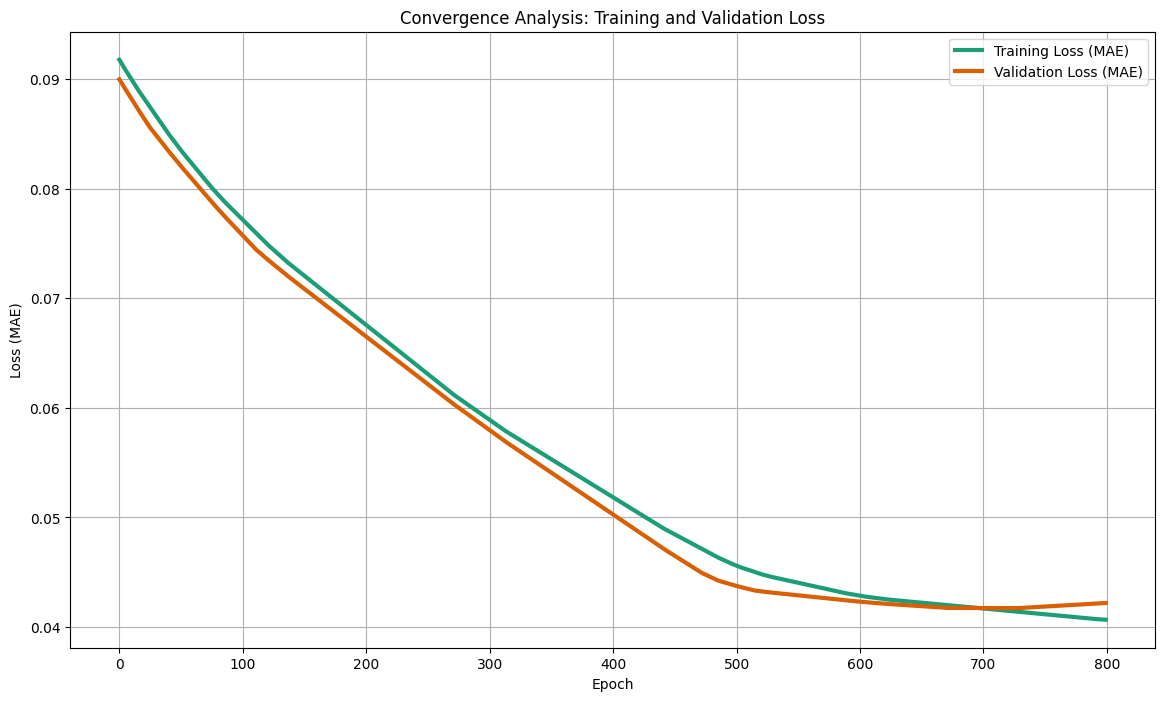

In [22]:
# Plot training and validation losses
plt.figure(figsize=(14, 8))
plt.plot(training_loss, label='Training Loss (MAE)', linewidth=3, color='#1b9e77')
plt.plot(validation_loss, label='Validation Loss (MAE)', linewidth=3, color='#d95f02')
plt.xlabel('Epoch')
plt.ylabel('Loss (MAE)')
plt.title('Convergence Analysis: Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

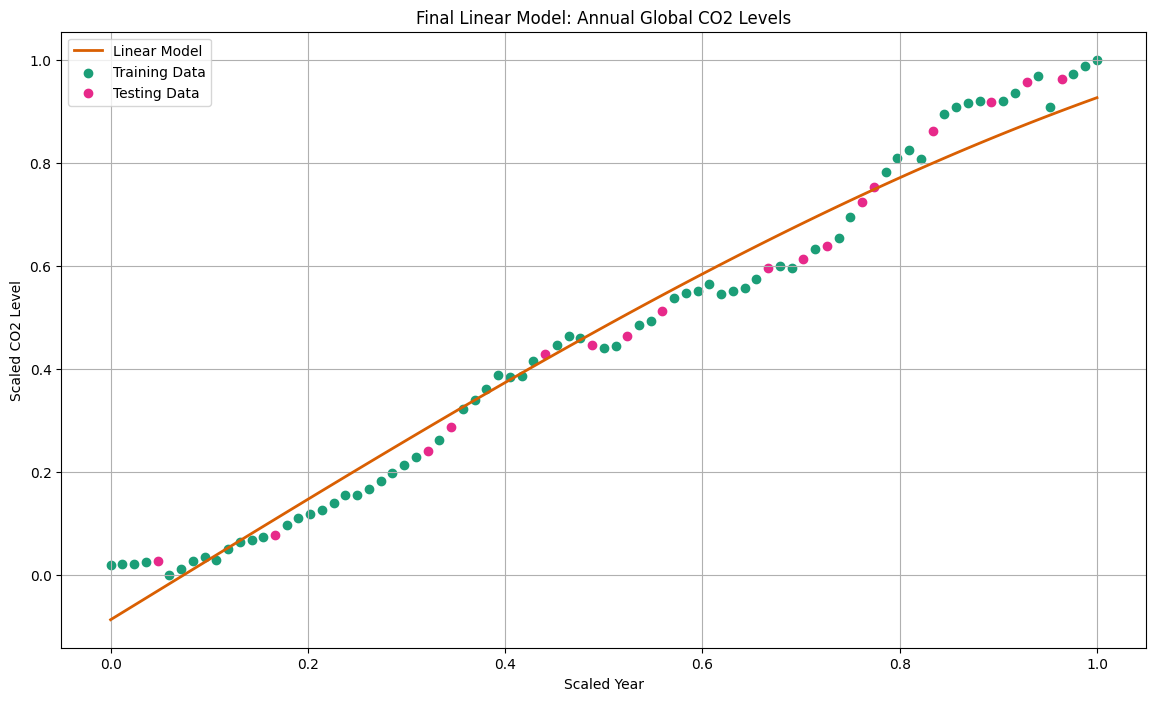

In [23]:
# Generate predictions for visualization
x = np.linspace(0, 1, 100)
y = sinModel(a, b, c, d, x)

# Plot the final model
plt.figure(figsize=(14, 8))
plt.plot(x, y, linewidth=2, color='#d95f02', label='Linear Model')
plt.scatter(x_train_val, y_train_val, color='#1b9e77', label='Training Data')
plt.scatter(x_test, y_test, color='#e7298a', label='Testing Data')
plt.xlabel('Scaled Year')
plt.ylabel('Scaled CO2 Level')
plt.title('Final Linear Model: Annual Global CO2 Levels')
plt.legend()
plt.grid(True)
plt.show()

The resulting model is expressed as:

$$ y = 1.19 \sin(0.99x - 0.04) - 0.037$$

Final Test Loss (MAE): 0.0445


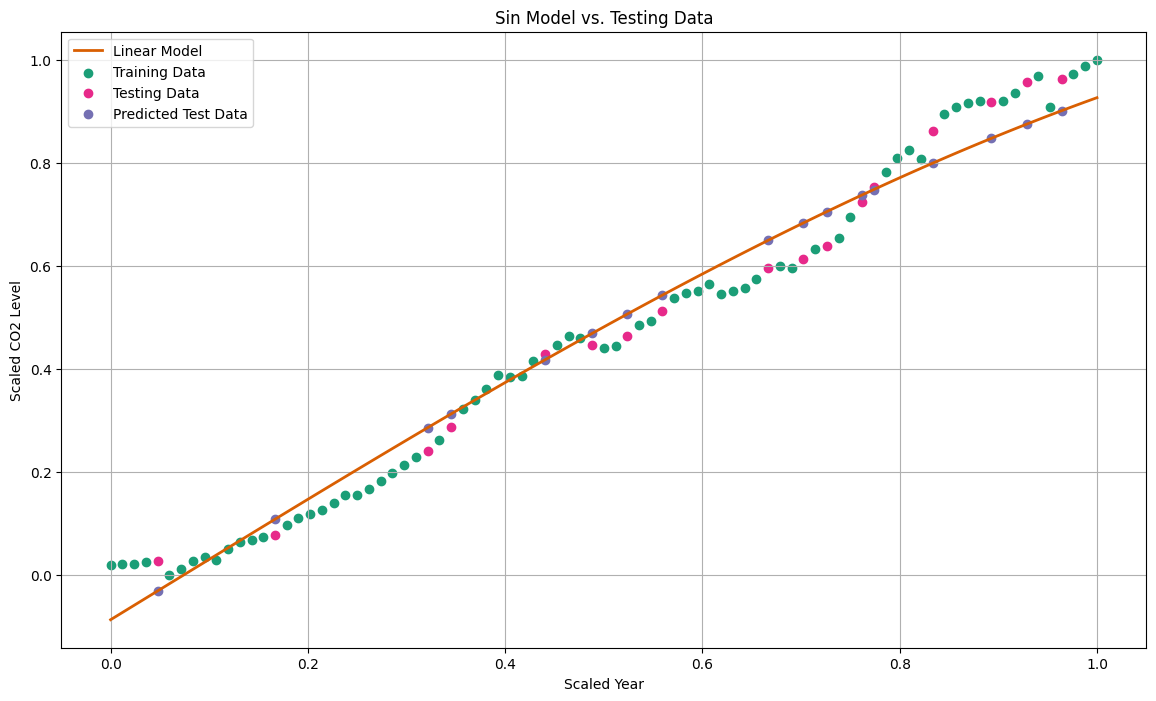

In [24]:
# Evaluate the model on the test set
y_pred_test = sinModel(a, b, c, d, x_test)
test_loss = sinError(a, b, c, d, x_test, y_test)

# Print the test loss
print(f"Final Test Loss (MAE): {test_loss:.4f}")

# Plot the model's predictions against the test data
plt.figure(figsize=(14, 8))
plt.plot(x, y, linewidth=2, color='#d95f02', label='Sin Model')
plt.scatter(x_train_val, y_train_val, color='#1b9e77', label='Training Data')
plt.scatter(x_test, y_test, color='#e7298a', label='Testing Data')
plt.scatter(x_test, y_pred_test, color='#7570b3', label='Predicted Test Data')
plt.xlabel('Scaled Year')
plt.ylabel('Scaled CO2 Level')
plt.title('Sin Model vs. Testing Data')
plt.legend()
plt.grid(True)
plt.show()